In [27]:
%matplotlib inline

import calendar
import datetime as datetime

import pandas as pd
import numpy as np
import scipy

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [2]:
# อ่านข้อมูล
df = pd.read_csv('path_file/data_price.csv', index_col='Date', parse_dates=True)

In [4]:
df['return'] = df['close'].pct_change()

In [6]:
df.drop(['fed_rates', 'vix_index', 'dollars_index', 'spdr_gold_tonnes', 'personal_consump'], axis='columns', inplace=True)

In [8]:
df.dropna(inplace=True)

In [10]:
xau = df

In [17]:
# กำหนดช่วงเวลา 2007 - 2019
xau = xau["2007":"2019"]
# สร้าง columns ใหม่โดยตั้งชื่อวัน / เดือน / ปี จากความสามารถของ Pandas Library ลงบน DataFrame
xau["Weekday"] = xau.index.weekday.values
xau["Weekday"] = xau["Weekday"].apply(lambda x: calendar.day_name[x])

xau["Month"] = xau.index.month.values
xau["Month"] = xau["Month"].apply(lambda x: calendar.month_name[x])

xau["Year"] = xau.index.year.values
xau["Year"] = xau["Year"].astype(str)
xau.head(10)

,close,return,Weekday,Month,Year
Dates,,,,,
2007-01-03,627.5,-0.014450,Wednesday,January,2007
2007-01-04,622.0,-0.008765,Thursday,January,2007
2007-01-05,607.4,-0.023473,Friday,January,2007
2007-01-08,610.0,0.004281,Monday,January,2007
2007-01-09,613.7,0.006066,Tuesday,January,2007
2007-01-10,611.3,-0.003911,Wednesday,January,2007
2007-01-11,611.6,0.000491,Thursday,January,2007
2007-01-12,627.2,0.025507,Friday,January,2007
2007-01-16,624.8,-0.003827,Tuesday,January,2007


In [18]:
xau_weekday_mean = xau.groupby("Weekday").mean()

# Reoder ใหม่โดยเรียงจากวัน และนำค่าเฉลี่ยราคา และผลตอบแทนมา Group ไว้ด้วยกัน
xau_weekday_mean = xau_weekday_mean.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
xau_weekday_mean

,close,return
Weekday,,
Monday,1229.415167,-0.000265
Tuesday,1232.621482,-0.000025
Wednesday,1231.955291,0.000505
Thursday,1231.720669,-0.000180
Friday,1233.927416,0.001570


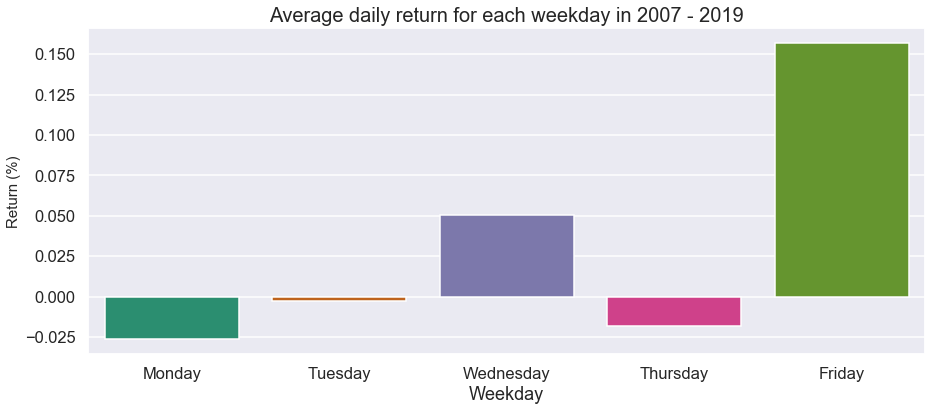

In [30]:
x = xau["Weekday"]  # เสนอกราฟแกน x ตามจำนวนวัน  
y = 100*xau_weekday_mean["return"]  # เสนอกราฟแกน y ตาม %ผลตอบแทน

xau_weekday_mean = xau_weekday_mean.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
xau_weekday_mean

# แสดงผลตอบแทนตามวัน

fig, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x=xau_weekday_mean.index, y=y, data=xau_weekday_mean)
ax = plt.ylabel("Return (%)", size=15)
ax = plt.title("Average daily return for each weekday in 2007 - 2019", size=20)
plt.savefig('osbx1.png')
plt.show()

In [37]:
# Perform statistical analysis
from scipy import stats

average_return = xau_weekday_mean["return"].mean()

for day in xau_weekday_mean.index.values:
    sample = np.array(xau[xau.Weekday == day]["return"])
    print(day,":", stats.ttest_1samp(sample, average_return))

Monday : Ttest_1sampResult(statistic=-1.3346155396284032, pvalue=0.18251098280343558)
Tuesday : Ttest_1sampResult(statistic=-0.817302389182767, pvalue=0.41404747751296744)
Wednesday : Ttest_1sampResult(statistic=0.41933845853029644, pvalue=0.6751036091575979)
Thursday : Ttest_1sampResult(statistic=-1.1487268539444482, pvalue=0.25108667209550967)
Friday : Ttest_1sampResult(statistic=2.7898468354383223, pvalue=0.005427137888369672)


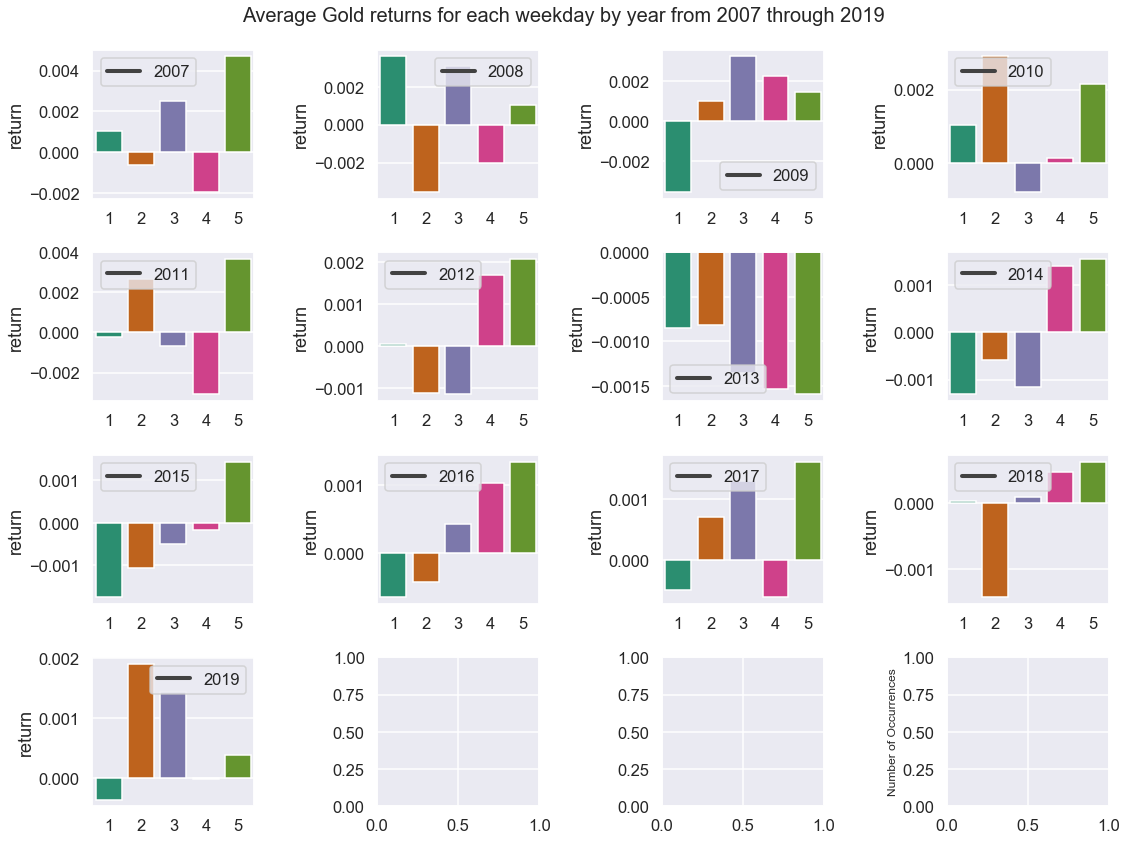

In [38]:
years = range(2007, 2020)
nr_rows = 4
nr_cols = 4
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3), squeeze=False)

axis = []
for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        axis.append(axs[r][c])


count = 0
for year in years:
    xau_year = xau[str(year)]
    # ค่าเฉลี่ยผลตอบแทนรายสัปดาห์
    xau_year = xau_year.groupby("Weekday").mean()
    # reorder
    xau_year = xau_year.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
    # แสดงผล
    sns.barplot(x=[1,2,3,4,5], y="return", data=xau_year, ax=axis[count])
    plt.ylabel('Number of Occurrences', fontsize=12)
    axis[count].legend([str(years[count])])
    count = count + 1

fig.suptitle("Average Gold returns for each weekday by year from 2007 through 2019", size=20)
plt.tight_layout()
fig.subplots_adjust(top=0.93)
plt.savefig('xau3.png')
plt.show()

In [39]:
months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]


# add 1 to the return columm and only keep the relevant columns
xau["return"] = xau["return"] + 1
xau_month = xau[["return", "Month", "Year"]]
# subtract 1 again to get back the return
xau["return"] = xau["return"] - 1

# group by Month and multiply the returns+1 together for each month, subtracting 1 at the end
xau_month = xau_month.groupby(["Month", "Year"]).prod()-1
# convert the returns to percentage
xau_month["return"] = xau_month["return"]


xau_month.reset_index(inplace=True)
xau_month.Month = xau_month.Month.astype("category")
xau_month.Month.cat.set_categories(months, inplace=True)
xau_month.sort_values(["Month"], inplace=True)
xau_month

,Month,Year,return
56,January,2011,-0.062417
64,January,2019,0.030222
63,January,2018,0.032499
62,January,2017,0.055094
61,January,2016,0.053822
...,...,...,...
30,December,2011,-0.103897
29,December,2010,0.025371
26,December,2007,0.064004
33,December,2014,0.014554


In [40]:
# sort the years as well
xau_returns = pd.DataFrame(columns=xau_month.columns)
count = 0
for i in range(0,12):
    xau_year = xau_month[24*i:24*(i+1)]
    xau_year.Year = xau_year.Year.astype("category")
    xau_year.Year.cat.set_categories([str(year) for year in years], inplace=True)
    xau_year.sort_values(["Year"], inplace=True)
    xau_returns = pd.concat([xau_returns, xau_year], ignore_index=True)
    count = count + 1

xau_returns

/Users/tanapat/opt/anaconda3/envs/finno/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Month,Year,return
0,February,2007,0.024724
1,January,2007,0.025915
2,January,2008,0.110831
3,February,2008,0.051614
4,February,2009,0.015595
...,...,...,...
151,December,2014,0.014554
152,December,2015,-0.003447
153,December,2016,-0.021906
154,December,2017,0.021796


In [41]:
# calculate the average monthly return for all months
xau_month_returns = xau_returns.groupby(["Month"]).mean()

# reorder
xau_month_returns = xau_month_returns.reindex(months)
xau_month_returns

,return
Month,
January,0.038974
February,0.018012
March,-0.012091
April,0.005809
May,-0.008237
June,0.003367
July,0.006552
August,0.023428
September,0.000381


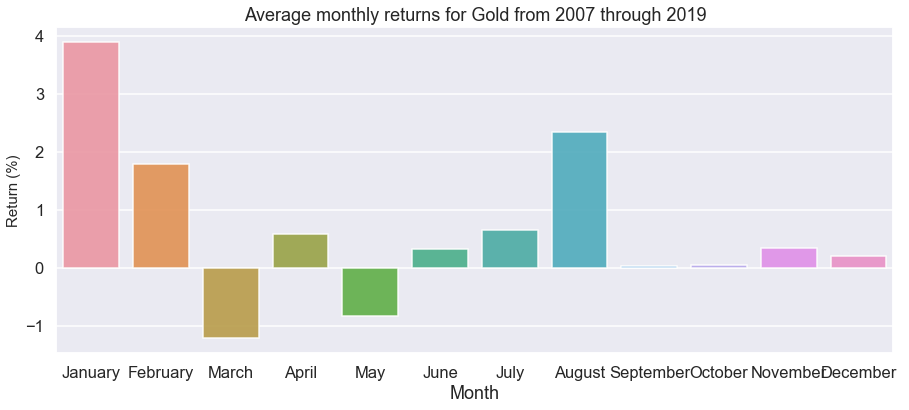

In [42]:
# plot the barplot
import seaborn as sns
#sns.set_style("whitegrid")
sns.set_palette("pastel")
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x=xau_month_returns.index, y=100*xau_month_returns["return"], alpha=0.9)
ax = plt.ylabel("Return (%)", size=15)
ax = plt.title("Average monthly returns for Gold from 2007 through 2019", size=18)
plt.savefig('xau4.png')
plt.show()

In [43]:
# average monthly return over all months
average_return = xau_month_returns.mean()
average_return[0]

0.006868304399265467

In [44]:
from scipy import stats

for month in months:
    sample = xau_returns[xau_returns.Month == month]["return"]
    print(month,":", stats.ttest_1samp(sample, average_return))
    print()

January : Ttest_1sampResult(statistic=return    2.376151
dtype: float64, pvalue=array([0.03500731]))

February : Ttest_1sampResult(statistic=return    0.841077
dtype: float64, pvalue=array([0.41675004]))

March : Ttest_1sampResult(statistic=return   -3.435661
dtype: float64, pvalue=array([0.00493383]))

April : Ttest_1sampResult(statistic=return   -0.086382
dtype: float64, pvalue=array([0.93258707]))

May : Ttest_1sampResult(statistic=return   -1.207978
dtype: float64, pvalue=array([0.25032414]))

June : Ttest_1sampResult(statistic=return   -0.222577
dtype: float64, pvalue=array([0.8276081]))

July : Ttest_1sampResult(statistic=return   -0.026068
dtype: float64, pvalue=array([0.97963172]))

August : Ttest_1sampResult(statistic=return    1.114894
dtype: float64, pvalue=array([0.28672654]))

September : Ttest_1sampResult(statistic=return   -0.395267
dtype: float64, pvalue=array([0.69958238]))

October : Ttest_1sampResult(statistic=return   -0.371468
dtype: float64, pvalue=array([0.716764

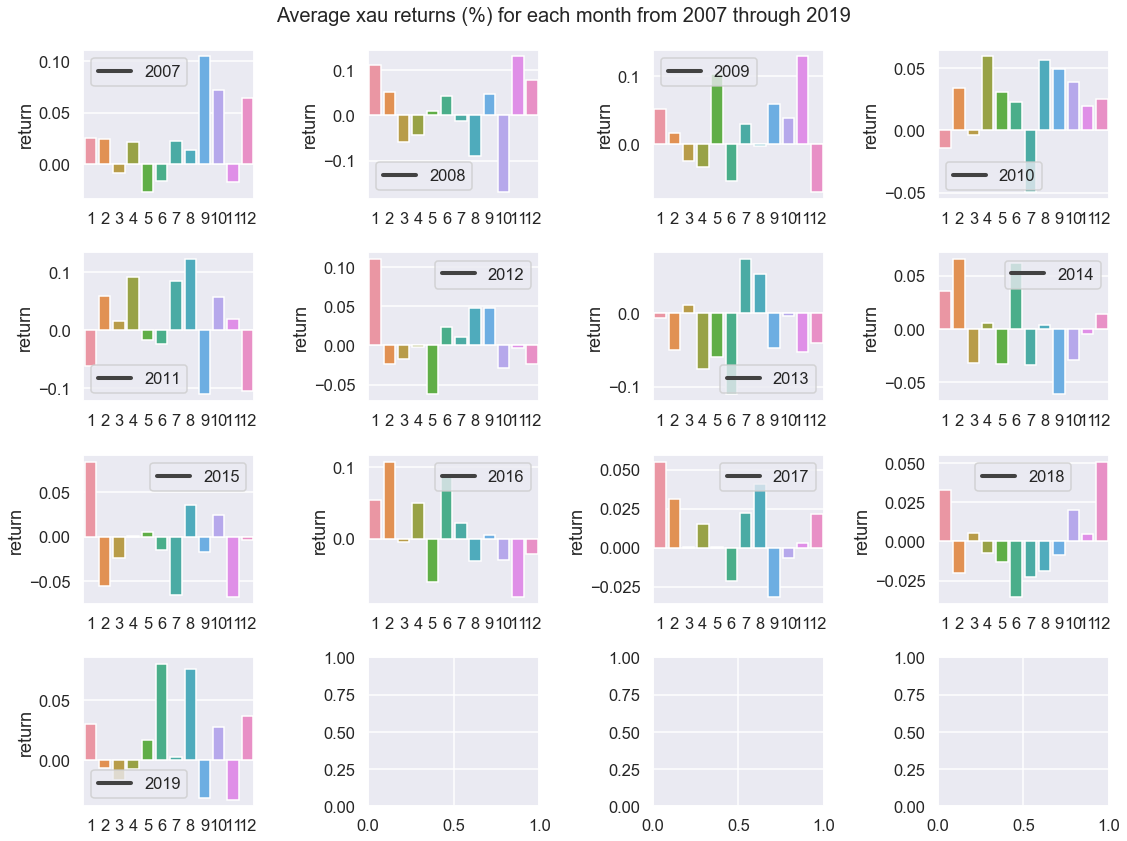

In [50]:
# Plot of the monthly return for each year from 1996 through 2019 in percentage
years = range(2007, 2020)
nr_rows = 4
nr_cols = 4
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3), squeeze=False)

axis = []
for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        axis.append(axs[r][c])

count = 0
for year in years:
    xau_year = xau_returns[xau_returns.Year == str(year)]
    # Mean return for each weekday
    xau_year = xau_year.groupby("Month").mean()
    # reorder
    xau_year = xau_year.reindex(["January", "February", "March", "April",
                                   "May", "June", "July", "August", "September", "October", "November", "December"])
    # plot
    axis[count] = sns.barplot(x=[1,2,3,4,5,6,7,8,9,10,11,12], y="return", data=xau_year, ax=axis[count])
    #axis[count].ylabel("Return (%)")
    axis[count].legend([str(years[count])])
    count = count + 1

fig.suptitle("Average xau returns (%) for each month from 2007 through 2019", size=20)
plt.tight_layout()
fig.subplots_adjust(top=0.93)
plt.savefig('xau6.png')
plt.show()